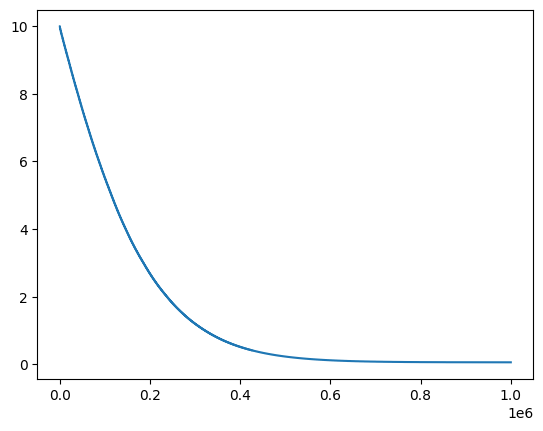

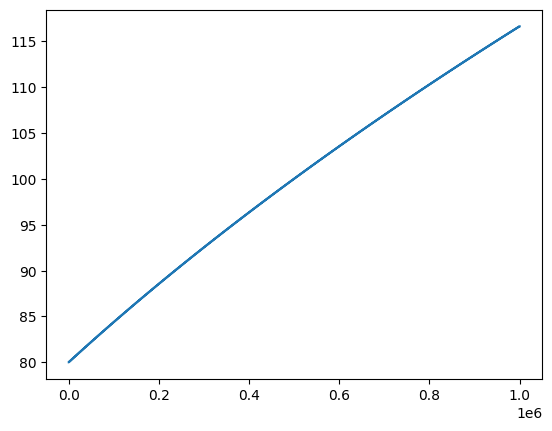

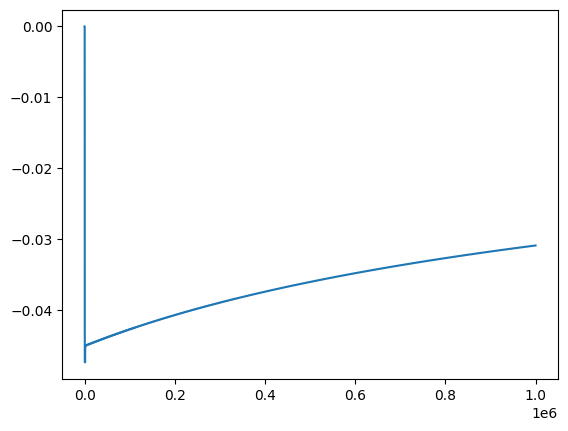

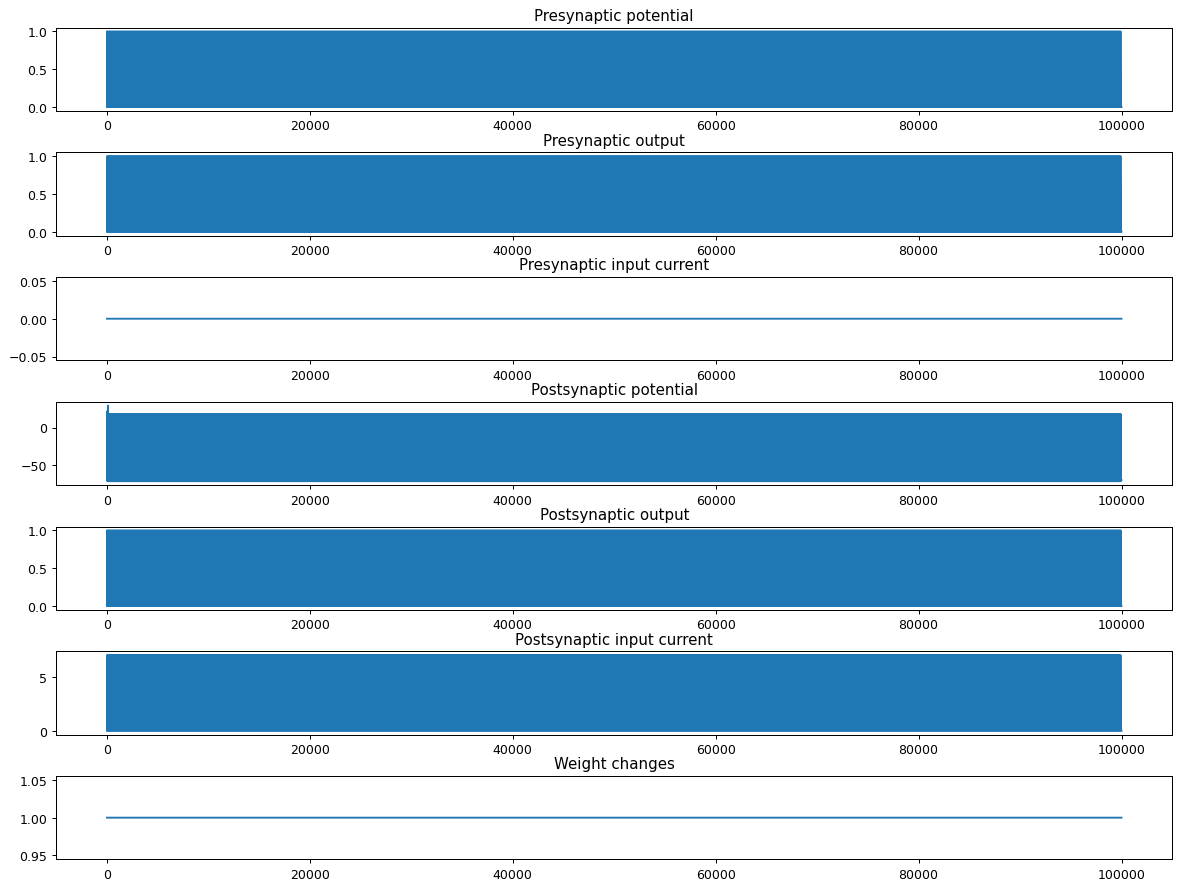

In [2]:
from rustyspikes import *

#model = syn_with_outer_cur(rt=100, aw=1, I=3, delay=1, d_lr=100)
#model = single_delayed(rt=150, aw=1, delay=1, d_lr=100)
model = dr_izh_single(sc=7, rt0=100, aw0=1, d_lr=10, b=8.0, delay=1)
gatherer = Gatherer(model)
model.show_config()
def run_b_test(time, gatherer, model):
    time_range=np.arange(int(time / res)) * res
    delays = []
    bs = []
    db = []
    for i in time_range:
        #print(i, model.syn_by_edge[0,1].delay, model.syn_by_edge[0,1].b)
        model.tick()
        gatherer.gather_stats()
        delays.append(model.syn_by_edge[0,1].delay)
        bs.append(model.syn_by_edge[0,1].b)
        db.append(model.syn_by_edge[0,1].delta_b)
    return time_range, delays, bs, db
time = 100000
time_range, delays, bs, db = run_b_test(time, gatherer, model)
plt.plot(delays)
plt.show()
plt.plot(bs)
plt.show()
plt.plot(db)
draw_stats_gatherer(*gatherer.get_stats(pre_ids=model.get_incoming_synapses(model.get_output_ids()),
                                                post_ids=model.get_output_ids()), time_range=time_range, resolution=res, dpi=90)

In [2]:
from rustyspikes import *

In [3]:
model = delayed_10_inputs(rt=150, aw=7, dels=10, m_delay=300, scale=3.5, b=10.8, d_lr=1)
gatherer = Gatherer(model)
model.show_config()

{'Neurons': {0: <neurons.Spikes_at_will at 0x1722bc9f590>,
  1: <neurons.Spikes_at_will at 0x171efb95d10>,
  2: <neurons.Spikes_at_will at 0x171f23bacd0>,
  3: <neurons.Spikes_at_will at 0x17186fd0990>,
  4: <neurons.Spikes_at_will at 0x17186fd0810>,
  5: <neurons.Spikes_at_will at 0x17186fd1c50>,
  6: <neurons.Spikes_at_will at 0x17186fd1810>,
  7: <neurons.Spikes_at_will at 0x17186fd2b50>,
  8: <neurons.Spikes_at_will at 0x17186fd2590>,
  9: <neurons.Spikes_at_will at 0x17186fd2550>,
  10: <neurons.Izhikevich at 0x17186fd2a50>},
 'Synapses': {(0, 10): <synaptics.Delayed_synapse at 0x17186fd2cd0>,
  (1, 10): <synaptics.Delayed_synapse at 0x17186fd2e10>,
  (2, 10): <synaptics.Delayed_synapse at 0x17186fd2090>,
  (3, 10): <synaptics.Delayed_synapse at 0x17186fd3790>,
  (4, 10): <synaptics.Delayed_synapse at 0x17186fd3810>,
  (5, 10): <synaptics.Delayed_synapse at 0x17186fd1110>,
  (6, 10): <synaptics.Delayed_synapse at 0x17186fc9650>,
  (7, 10): <synaptics.Delayed_synapse at 0x17186fcb9

In [4]:
def run_b_test(time, gatherer, model):
    time_range=np.arange(int(time / res)) * res
    delays = []
    bs = [[] for i in range(10)]
    for i in time_range:
        #print(i, model.syn_by_edge[0,1].delay, model.syn_by_edge[0,1].b)
        model.tick()
        #gatherer.gather_stats()
        delays.append(model.syn_by_edge[0, *model.get_output_ids()].delay)
        for edge in model.syn_by_edge.keys():
            bs[edge[0]].append(model.syn_by_edge[edge].delay)
    return time_range, delays, bs
time = 1000000
time_range, delays, bs = run_b_test(time, gatherer, model)

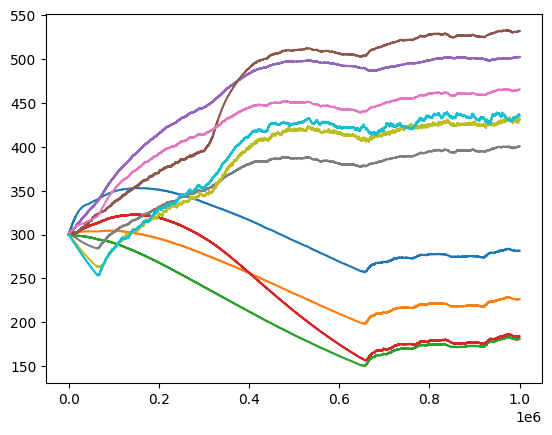

In [5]:
plt.plot(np.arange(int(time/ res)) * res, np.array(bs).T)
plt.show()